In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_hub as hub
import tensorflow as tf

In [2]:
labels_csv= pd.read_csv("E:\\dlprojects\\tfp\data\\labels.csv")
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

In [3]:

labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [4]:
plt.style.use(r'E:\dlprojects\tfp\files\deeplearning.mplstyle')

## Lets check and arrange our data 

<Axes: xlabel='breed'>

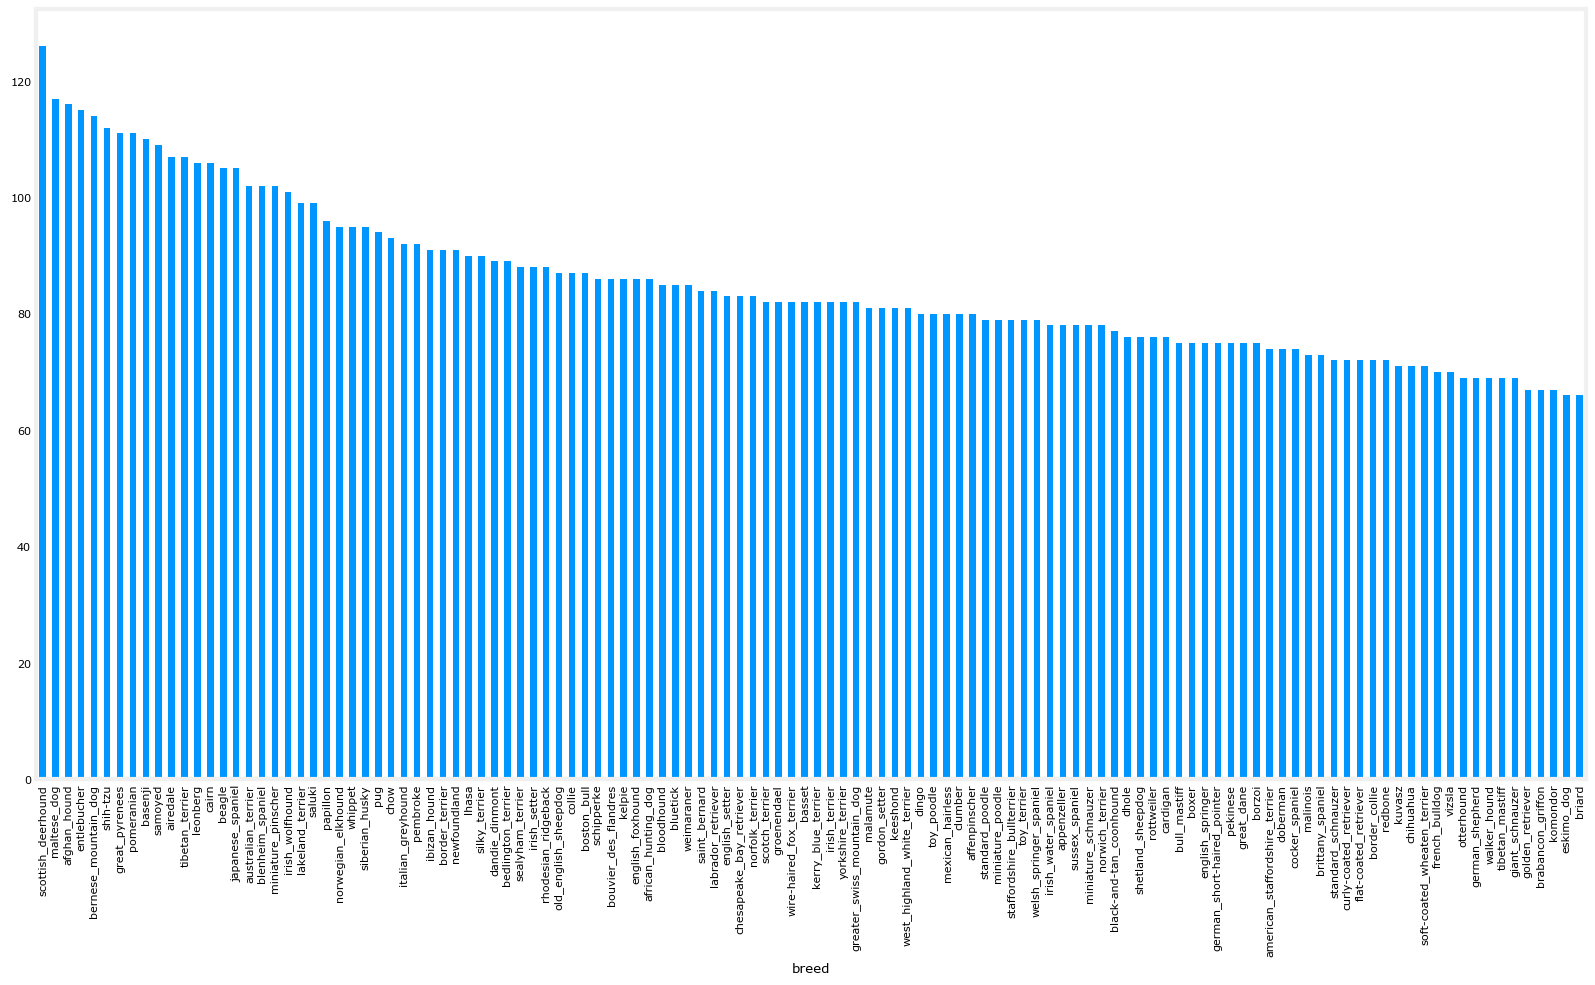

In [5]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

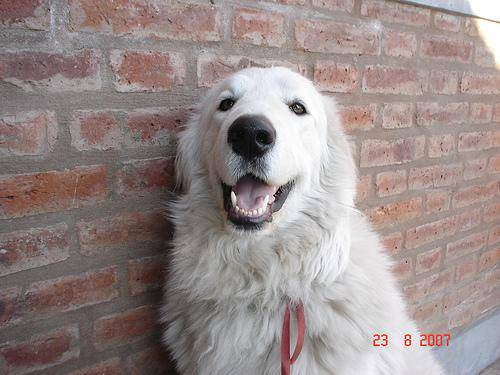

In [6]:
from IPython.display import Image
Image(r'E:\dlprojects\tfp\data\train\0a0c223352985ec154fd604d7ddceabd.jpg')

In [7]:


filenames = [ "E:\\dlprojects\\tfp\\data\\train\\" + fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]


['E:\\dlprojects\\tfp\\data\\train\\000bec180eb18c7604dcecc8fe0dba07.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\001cdf01b096e06d78e9e5112d419397.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\002211c81b498ef88e1b40b9abf84e1d.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\002a283a315af96eaea0e28e7163b21b.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\0042188c895a2f14ef64a918ed9c7b64.jpg']

In [8]:
import os
if len(os.listdir("E:\\dlprojects\\tfp\\data\\train\\"))== len(filenames):
    print("Filename match actual amount of files!! Proceed.")
else:
    print("Filename do not match actual files, check target directory!!")

Filename match actual amount of files!! Proceed.


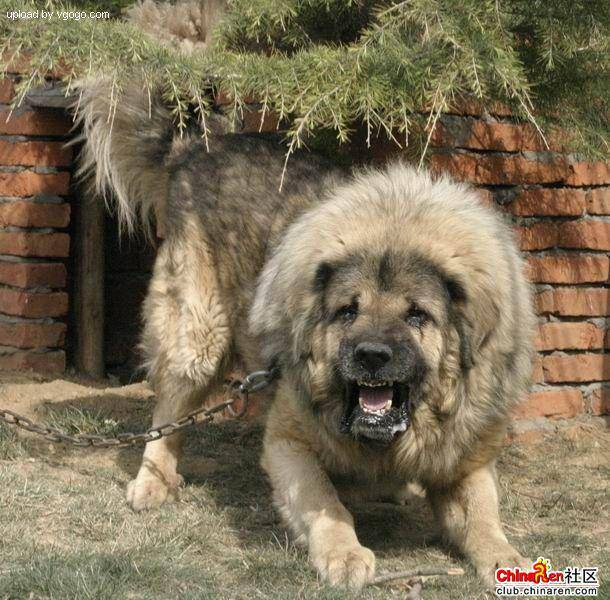

In [9]:
Image(filenames[9000])

In [10]:
labels = labels_csv['breed'].to_numpy()
labels


array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [11]:
len(labels)


10222

In [12]:
# Find the unique label values
unique_breeds=np.unique(labels)
len(unique_breeds)

120

In [13]:
# Turning labels to boolean array
boolean_labels = [label== unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [14]:
len( boolean_labels)

10222

In [15]:
# Example : Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [16]:
filenames[:10]

['E:\\dlprojects\\tfp\\data\\train\\000bec180eb18c7604dcecc8fe0dba07.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\001cdf01b096e06d78e9e5112d419397.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\002211c81b498ef88e1b40b9abf84e1d.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\002a283a315af96eaea0e28e7163b21b.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating a validation set

In [17]:
# x y instantiate
X= filenames
y=boolean_labels

In [18]:
# set number of images for experimenting
NUM_IMAGES = 5000 #@param {type:"slider", min:1000, max:10000}
filenames[:2]

['E:\\dlprojects\\tfp\\data\\train\\000bec180eb18c7604dcecc8fe0dba07.jpg',
 'E:\\dlprojects\\tfp\\data\\train\\001513dfcb2ffafc82cccf4d8bbaba97.jpg']

In [19]:
# splitting into train and validation 
import sklearn
from sklearn.model_selection import train_test_split
# splitting into train and val of total size NUM_IMAGES
X_train, X_val, y_train, y_val= train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)
len(X_train),len(y_train),len(X_val),len(y_val)

(4000, 4000, 1000, 1000)

In [20]:
X_train[:2], y_train[:2]

(['E:\\dlprojects\\tfp\\data\\train\\693f4cd00978df07e1283d3da4d02e0c.jpg',
  'E:\\dlprojects\\tfp\\data\\train\\7521421e092333c78d6b9dc2e189e659.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False,  True, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fals

### Turning images into tensors (Data Preprocessing)

Building a function for following tasks
* Take an image file path as input
* Use tensorflow to read the file and save it to a   variable named as 'image'
* Turn the 'image'(a jpg) into tensors
* Resize the 'image' into a shape maybe (224,224)
* return the modified 'image'


In [21]:

from matplotlib.pyplot import imread
image= imread(filenames[43])
image.shape


(500, 401, 3)

In [22]:
# Define image size
IMG_SIZE = 224

# Create a function for image preprocessing
def process_image(image_path, label=None, img_size=IMG_SIZE):
    """
    Takes an image file path and an optional label and turns the image into a Tensor.
    If a label is provided, it returns (image, label).
    """
    # Read in an image file
    image = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical tensor with 3 color channels (RGB)
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the color channel values from 0-255 to 0-1
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize the image to our desired size (224, 224)
    image = tf.image.resize(image, size=[img_size, img_size])

    # Return both image and label if label is provided
    if label is not None:
        return image, label
    return image  # For test data


### Turning our data into batches

* Lets say we have to process 10000+ images in one go .... they might not fit in memory
* So thats why we do 32 (a batch size) images at a time , batch size can vary by use
* In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this (image , label)


In [23]:
# create a simple function that returns a tuple (image , label)
def get_image_label(image_path, label):
    """
    Takes an image path name and the associated label,
    process the image and returns a tuple of typle(image, label)
    """
    image = process_image(image_path)
    return image,label



In [24]:
(process_image(X[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now lets convert into our tupled data into batches 

In [25]:
# Define the batch size, 32 is good to start
BATCH_SIZE = 32

# create a function to turn whole data into batches 
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
    """
    Creates batches of data out of image (X) and label (Y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no labels).
    """
    # If the data is a test dataset, we probably don't have any labels
    if test_data:
        print("Creating test data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))  # only filepaths no labels
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    # If our data is valid dataset we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),  # filepaths
                                                   tf.constant(y))) # labels
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    else:
        print("Creating training data batches...")
        # Create the data as a tf.data.Dataset
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
        # Shuffle the dataset
        data = data.shuffle(buffer_size=len(X))
        # Create (image, label) tuples
        data = data.map(get_image_label)
        # Turn the training data into batches
        data_batch = data.batch(BATCH_SIZE)
        return data_batch


In [26]:
# Create val and training data batches
train_data= create_data_batches(X_train,y_train)
val_data= create_data_batches(X_val,y_val, valid_data = True)

Creating training data batches...
Creating validation data batches...


In [27]:
# checj out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

### Visualising Data Batches

our data is now in batches, however , these batches an be little hard to understand/ comprehend, lets visualize them!

In [28]:
# Create a function to view images in our data batch
def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a dat batch
    """
    # Setup the figure
    plt.figure(figsize=(10,10))
    # loopp through 25 (for displaying 25 images)
    for i in range(25):
        #create subplots (5 rows, 5 columns)
        ax= plt.subplot(5,5,i+1)
        # Display an image
        plt.imshow(images[i])
        # add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        #Turn the grid lines off
        #plt.axis("off")

In [29]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [30]:
train_images , train_labels = next(train_data.as_numpy_iterator())
train_images,train_labels

(array([[[[8.62745166e-01, 8.78431439e-01, 8.90196145e-01],
          [8.62745166e-01, 8.78431439e-01, 8.90196145e-01],
          [8.62745166e-01, 8.78431439e-01, 8.90196145e-01],
          ...,
          [8.73617053e-01, 8.93224895e-01, 9.04989600e-01],
          [8.79464388e-01, 8.99072230e-01, 9.10836935e-01],
          [8.82353008e-01, 9.01960850e-01, 9.13725555e-01]],
 
         [[8.66071522e-01, 8.81757796e-01, 8.93522501e-01],
          [8.66071522e-01, 8.81757796e-01, 8.93522501e-01],
          [8.66071522e-01, 8.81757796e-01, 8.93522501e-01],
          ...,
          [8.77538621e-01, 8.97146463e-01, 9.08911169e-01],
          [8.83229196e-01, 9.02837038e-01, 9.14601743e-01],
          [8.85679364e-01, 9.05287206e-01, 9.17051911e-01]],
 
         [[8.66981864e-01, 8.82668138e-01, 8.94432843e-01],
          [8.66981864e-01, 8.82668138e-01, 8.94432843e-01],
          [8.66981864e-01, 8.82668138e-01, 8.94432843e-01],
          ...,
          [8.81703556e-01, 9.01311398e-01, 9.1307

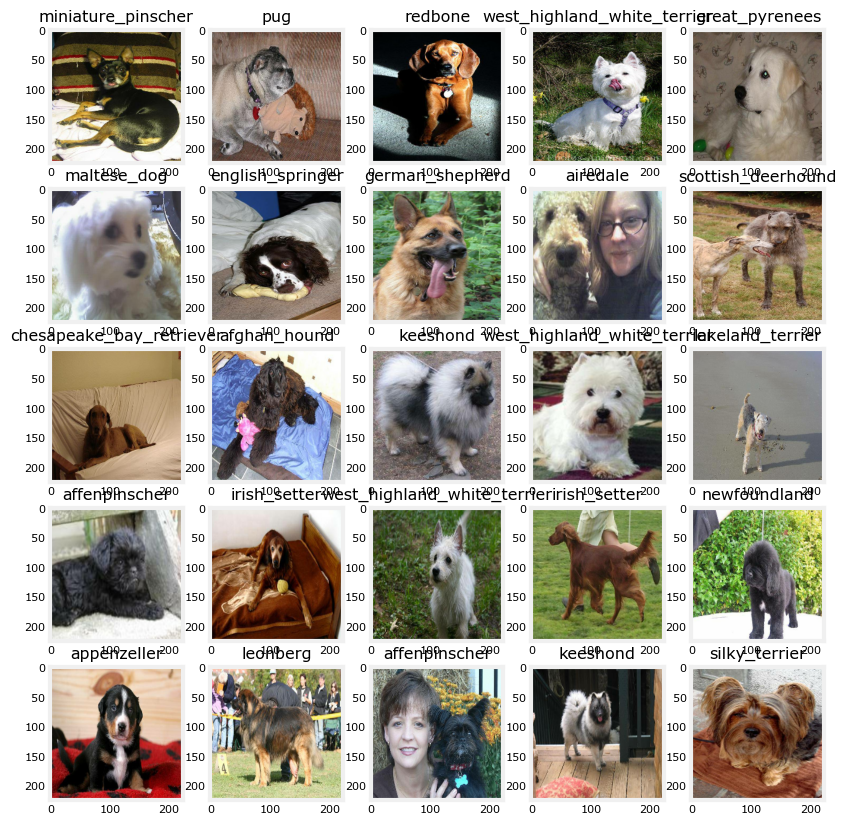

In [31]:
# now lets visualise it
train_images , train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

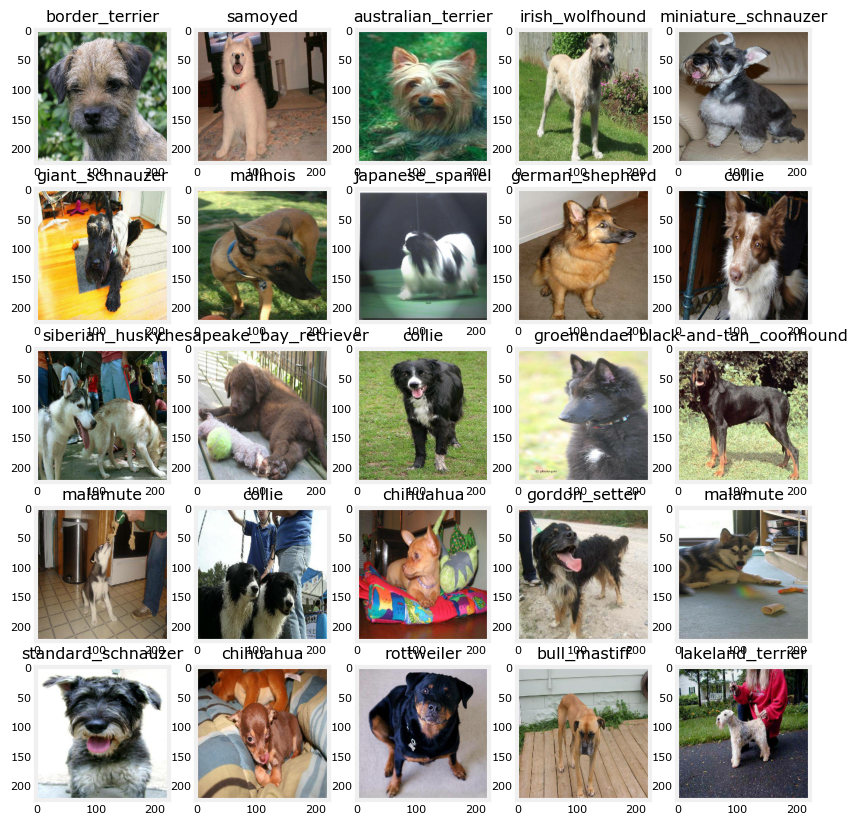

In [32]:
# now lets visualise our val data
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

 # Building a model
 
 Before we build a model , there are a few things we need to define
 * The input shape (our images shape in the for of tensors) to our model
 * The output shape (image labels, in form of tensors) of our model
 * The URL of the model we want to use
 

In [33]:
# Setup input shape in the model
INPUT_SHAPE = [None , IMG_SIZE,IMG_SIZE,3]# batch size, height,width,color channels
#Setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)
# Model URL from tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

 Now we've got our inputs , outputs and model ready to go.
 Lets put them together into a keras deep learning model!
 Knowing  this, lets create a function which:
 * Takes the input shape, output shape and the model we've chosen as parameters.
 * Defines the layers in Keras model in sequential fashion (do this first , then this , then that).
 * Compiles the model (says it should be evaluated and improved)
 * Builds the model (tells the model the input shape it will be getting)
 * Returns the model

In [34]:
# Create a function which builds a keras model
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE , model_yrl = MODEL_URL):
    print("Building model with:", MODEL_URL)
    #  setup model layers 
    model= tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), #LAyer 1 (Input layer)
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation="softmax")# 2nd Layer (Output Layer)
    ])
    # compile the model
    model.compile(
        loss= tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    # build the model
    model.build(INPUT_SHAPE)
    return model

In [35]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as : save its progress or stop training early if a model stops improving.

We'll create two callbacks ,one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.

## TensorBorad Callback

To setup a TensorBoard callback, we need to do 3 things:
1. Load the tensorBoard notebook extension 
2. Create a TensorBoard callback which is able to save logs to a directory and pass it to our model's 'fit()' function
3. Visualise our model's training logs with '%tensorboard' magic function(we'll do this after model training )

In [36]:
%load_ext tensorboard

In [37]:
import datetime
# Create a function to build a Tensorboard callback
def create_tensorboard_callback():
    #create a log directory for storing tensorboard logs
    logdir = os.path.join("E:\\dlprojects\\tfp\\logs",
                          # Make it so the logs get tracked eachtime we run an experiment
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping callback helps stop  our model from overfitting by stopping training if a certain evaluation metric stops improving.

In [38]:
# create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience= 3)

### Training a nodel (on a subset of data)

our first model is only going totrain on 1000 images , to make sure everything is working

In [39]:
NUM_EPOCHS = 100 #@param {type : "slider", min:10,max:100}

In [40]:
print("GPU","available (Yess!!)" if tf.config.list_physical_devices("GPU")else "not available :(")

GPU not available :(


###  Lets create a function which trains a model
* Create a model using 'create_model()'
* Setup a tensorboarb callback using 'create_tensorboard_callback()'
* Call the 'fit()'function on our model passing it the training data, val data, no. of epochs to train for ("NIM_EPOCHS") and the callbacks we'd like to use
* Return the model

In [41]:
# Build a function to train and return a trained model
def train_model():
    """
    Train a given model and returns the trained  version.
    """
    #Create a model
    model = create_model()
    # Create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()
    # Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
              epochs=NUM_EPOCHS,
              validation_data= val_data,
              validation_freq=1,
              callbacks=[tensorboard, early_stopping])
    # Return the model
    return model
    

In [42]:
# Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
125/125 [==============================] - 76s 569ms/step - loss: 2.2269 - accuracy: 0.5045 - val_loss: 0.9154 - val_accuracy: 0.7430
Epoch 2/100
125/125 [==============================] - 68s 545ms/step - loss: 0.4769 - accuracy: 0.8798 - val_loss: 0.7624 - val_accuracy: 0.7730
Epoch 3/100
125/125 [==============================] - 68s 546ms/step - loss: 0.2416 - accuracy: 0.9557 - val_loss: 0.7436 - val_accuracy: 0.7830
Epoch 4/100
125/125 [==============================] - 68s 544ms/step - loss: 0.1491 - accuracy: 0.9793 - val_loss: 0.7167 - val_accuracy: 0.7770
Epoch 5/100
125/125 [==============================] - 67s 540ms/step - loss: 0.0962 - accuracy: 0.9898 - val_loss: 0.7218 - val_accuracy: 0.7840
Epoch 6/100
125/125 [==============================] - 77s 615ms/step - loss: 0.0655 - accuracy: 0.9967 - val_loss: 0.7165 - val_accuracy: 0.7880
Epoch 7/100
125/125 [==========

### Checking the tensorBoard logs

The TensorBoard magic function ('%tensorboard') will access the logs directory we created earlier and visualize its contents

In [54]:
tensorboard --logdir E:/dlprojects/tfp/logs --port 6008


Reusing TensorBoard on port 6008 (pid 26156), started 0:01:06 ago. (Use '!kill 26156' to kill it.)

###  Making and evaluating predictions using a trained model

In [44]:
# Make predictions on validation data (not used to train on)
predictions = model.predict(val_data, verbose =1)
predictions

32/32 [==============================] - 14s 425ms/step


array([[4.75868120e-07, 4.33208047e-09, 7.26017504e-08, ...,
        9.34245634e-07, 5.62924379e-06, 5.52687496e-08],
       [5.64336460e-06, 8.25859445e-07, 4.16392055e-07, ...,
        3.15736548e-09, 1.06809148e-06, 5.84138263e-07],
       [1.22969877e-03, 3.75514355e-06, 4.12806912e-05, ...,
        1.12165089e-05, 2.98494560e-04, 3.56869996e-02],
       ...,
       [1.28071971e-08, 3.05113645e-07, 1.38977402e-05, ...,
        1.17010835e-07, 3.90061265e-04, 2.30630590e-07],
       [2.48976605e-04, 7.92955416e-06, 2.37619065e-06, ...,
        1.43378775e-05, 5.09409525e-04, 9.32764728e-04],
       [1.04008234e-06, 1.91899319e-03, 2.33064497e-07, ...,
        3.27383816e-07, 4.46774720e-06, 1.14294882e-04]], dtype=float32)

In [45]:
predictions.shape

(1000, 120)

In [46]:
predictions[1]

array([5.6433646e-06, 8.2585944e-07, 4.1639206e-07, 7.0547865e-09,
       4.2287567e-08, 5.9539360e-07, 6.8939428e-08, 2.5488964e-06,
       4.0446280e-10, 6.5564421e-07, 4.2794021e-05, 5.5066328e-05,
       3.0577905e-07, 7.5661383e-06, 3.3825487e-09, 2.5145804e-08,
       1.1237575e-05, 3.6257639e-08, 3.2264165e-07, 1.2893794e-06,
       5.5183347e-07, 6.8017716e-06, 8.0132719e-07, 8.0775337e-08,
       3.8984261e-08, 4.7325898e-07, 5.6617981e-05, 3.0650738e-06,
       1.2651735e-07, 5.4667375e-06, 9.8856108e-05, 1.0818279e-07,
       1.5261305e-06, 1.3835439e-04, 3.7704424e-08, 2.8051316e-08,
       2.8881752e-05, 6.9743518e-09, 5.1661864e-06, 1.7337686e-07,
       1.9162733e-06, 3.4108933e-07, 1.6686931e-07, 2.8068901e-04,
       1.1116736e-06, 3.7470087e-07, 1.5332238e-07, 1.5001598e-07,
       2.8926377e-07, 1.3360377e-06, 2.1163221e-08, 1.0333478e-06,
       1.4191889e-04, 5.3581766e-07, 1.8080495e-05, 4.0887414e-07,
       1.8783311e-06, 1.4573587e-07, 2.3807272e-06, 4.2392861e

In [47]:
print(len(predictions[1]))
print(np.sum(predictions[1]))

120
1.0


In [48]:
# first prediction
index =2
print(f"Max value(prob. of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"max index: {np.max(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")


Max value(prob. of prediction): 0.8180432319641113
Sum: 0.9999999403953552
max index: 0.8180432319641113
Predicted label: australian_terrier


In [49]:
# Turm prediction probabilities into their respective labes (easier to understand)
def get_pred_label(prediction_probabilities):
    """ Turns an array of prediction probabilities into a label
    """
    return unique_breeds[np.argmax(prediction_probabilities)]
# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[62])
pred_label

'border_collie'

In [50]:
# create a function to unbatch the batch dataset
def unbatchify(data):
    """Takes a batched dataset of (image,labels)Tensors and returns seperate arrays of images and labels
    """
    images=[]
    labels=[]
    # loop through unbatched data
    for image,label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images,labels
# unbatchify the val data
val_images,val_labels = unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.08661207, 0.09751292, 0.07815619],
         [0.06751302, 0.0918505 , 0.05747823],
         [0.0604112 , 0.09729353, 0.04384629],
         ...,
         [0.83837754, 0.8455904 , 0.79945946],
         [0.7929071 , 0.7970798 , 0.7295842 ],
         [0.8214812 , 0.826038  , 0.75354415]],
 
        [[0.07184874, 0.09509204, 0.08496422],
         [0.06569613, 0.096114  , 0.0656529 ],
         [0.04666601, 0.09603959, 0.03923428],
         ...,
         [0.74699265, 0.75564605, 0.6929895 ],
         [0.72310936, 0.73635286, 0.6507261 ],
         [0.75028026, 0.76419234, 0.67546123]],
 
        [[0.04185049, 0.07891282, 0.07907913],
         [0.03230042, 0.08288307, 0.05734802],
         [0.02757026, 0.09470031, 0.03129049],
         ...,
         [0.65601474, 0.67997307, 0.56799006],
         [0.6598779 , 0.6838362 , 0.57188773],
         [0.68698364, 0.710942  , 0.5989934 ]],
 
        ...,
 
        [[0.326806  , 0.42850253, 0.3172997 ],
         [0.6370607 , 0.7247883 , 0.66578

Having the above functionality is great but we want to be able to do it at scale.

And it wpold be even better if we could see the image the prediction is made on!

**Note:** Prediction probabilities are alse known as confidence levels.

###

* takes an array of prediction probabilities , an array of truth labels and an array of images and an integer
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth and the target image on a single plot.


In [51]:
def plot_pred(prediction_probabilities, labels, images, n=1):
    """ View the prediction,ground truth and image for sample n
    """
    pred_prob, true_label, image=prediction_probabilities[n],labels[n],images[n]
    # Get the pred label
    pred_label= get_pred_label(pred_prob)
    #plot image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    # change the colour of title if prediction is right or wrong
    if pred_label==true_label:
        color = "green"
    else:
        color= "red"
    # change the title to be predicted , probability of prediction and truth label
    plt.title("{}{:.2f}% {}".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color) 

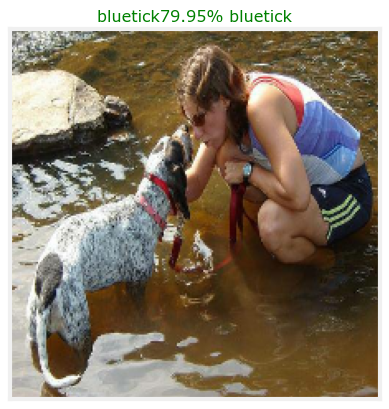

In [52]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=97)

Nice! Making functions to help visual your models results are really helpful in understanding how your model is doing.

Since we're working with a multi-class problem (120 different dog breeds), it would also be good to see what other guesses our model is making. More specifically, if our model predicts a certain label with 24% probability, what else did it predict?

Let's build a function to demonstrate. The function will:
* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using `get_pred_label()`.
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [55]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

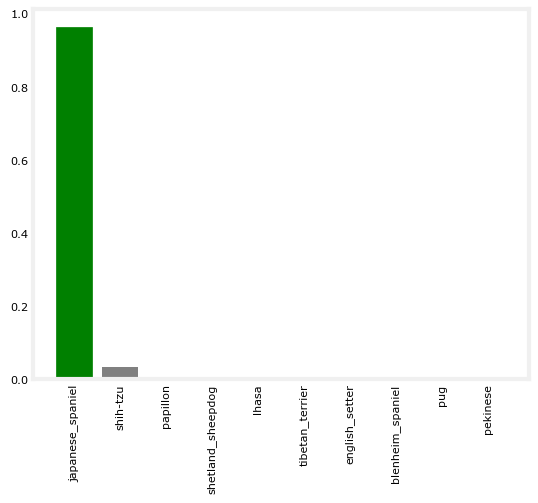

In [57]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=7)

Wonderful! Now we've got some functions to help us visualize our predictions and evaluate our model, let's check out a few.

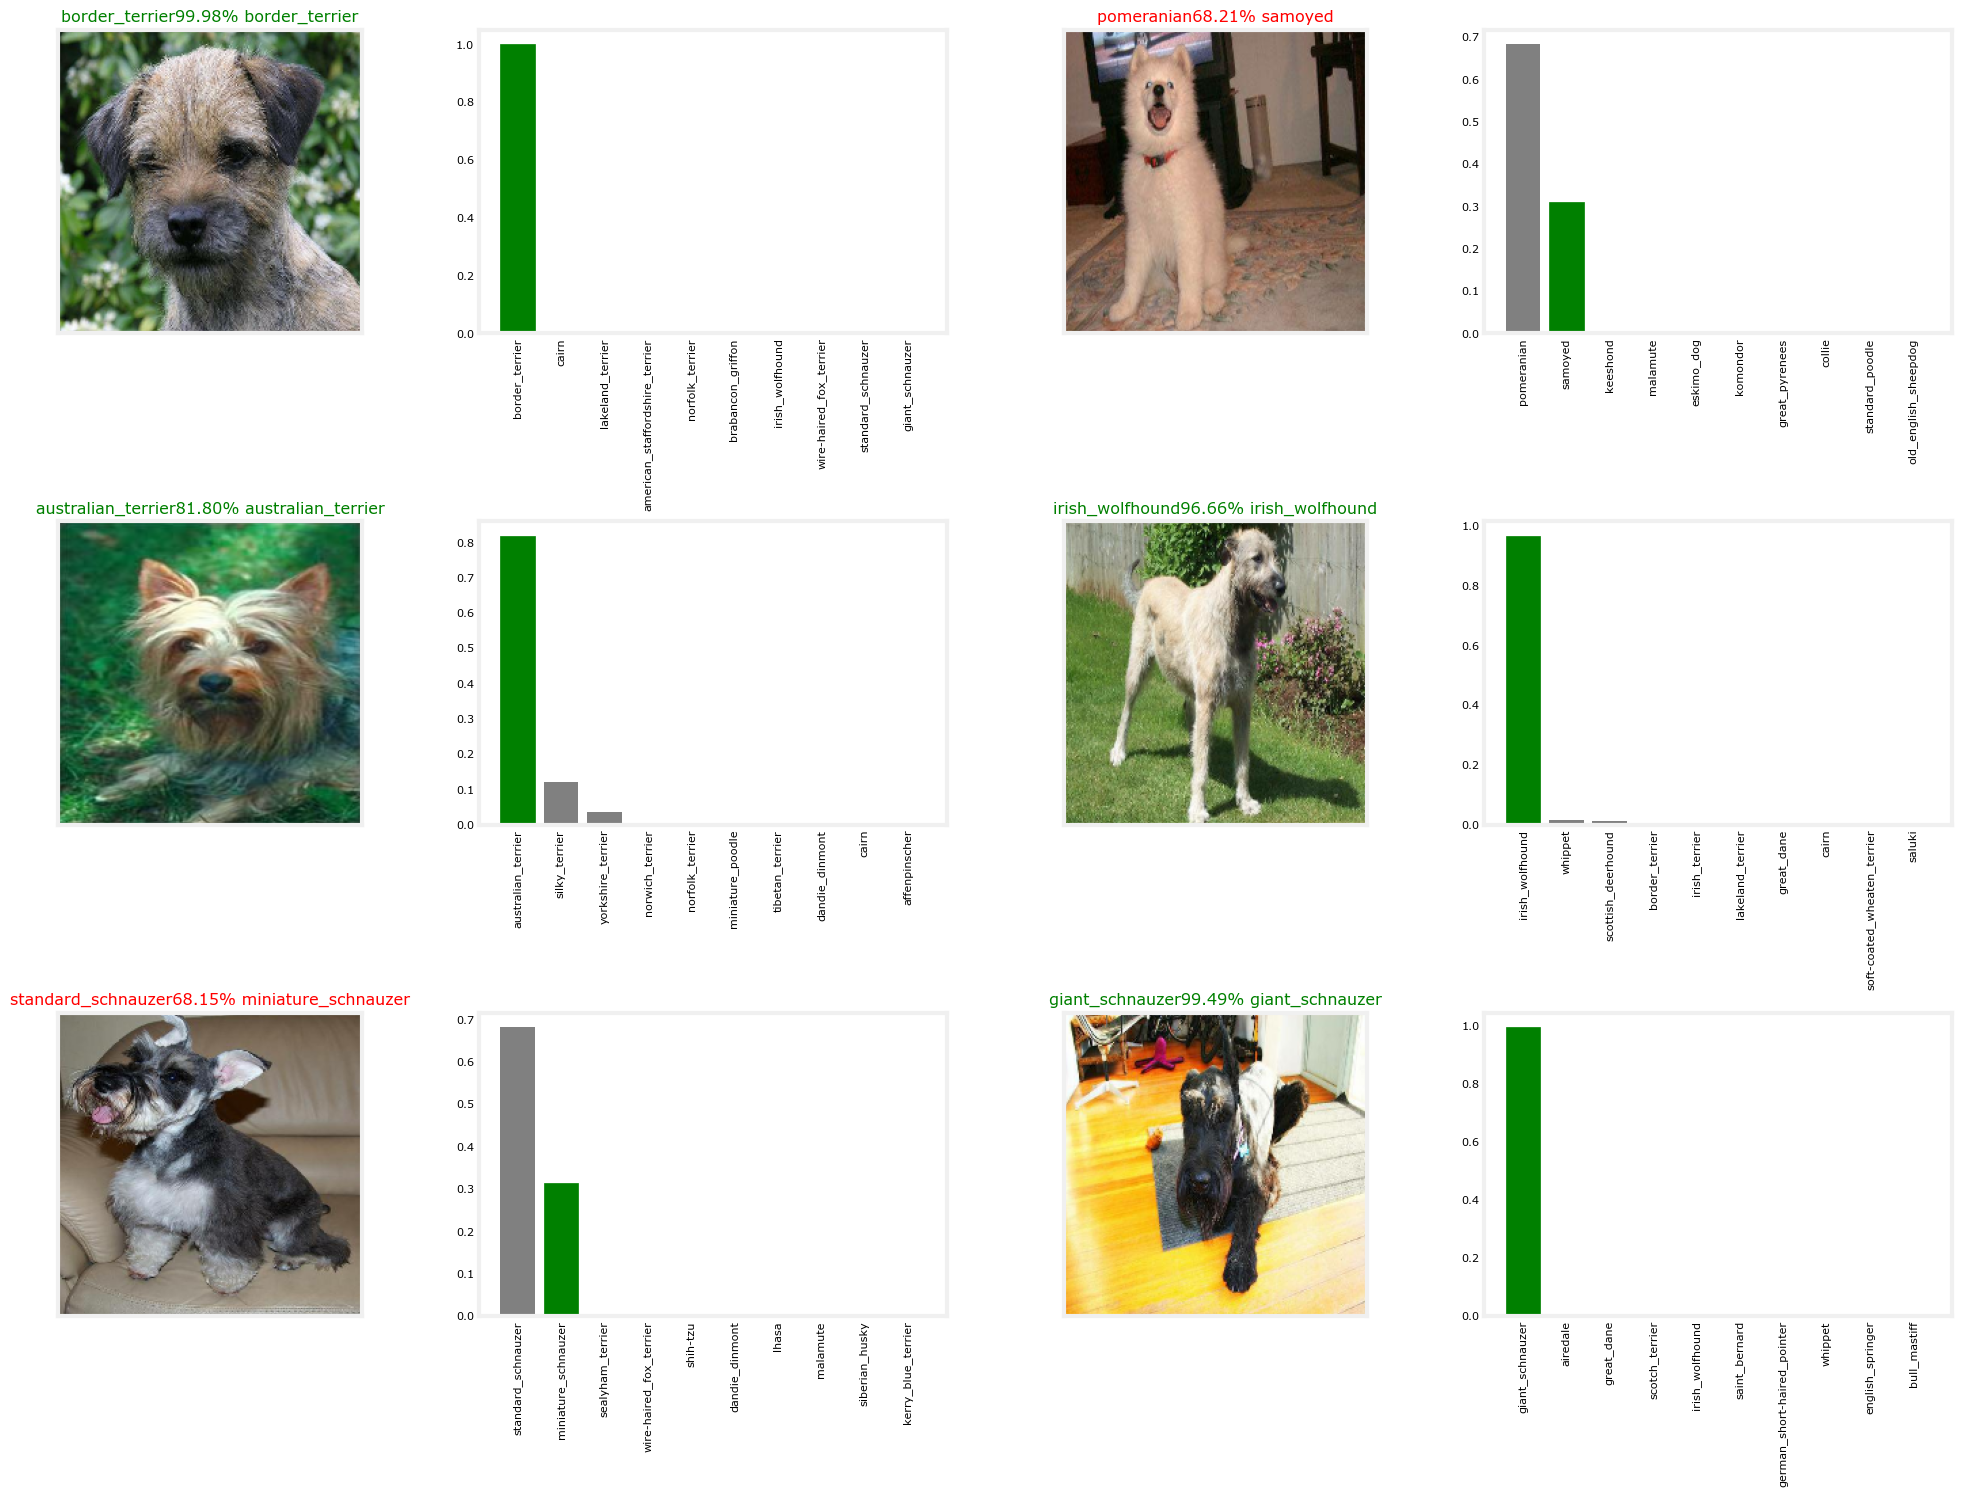

In [58]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Saving and reloading a model

After training a model, it's a good idea to save it. Saving it means you can share it with colleagues, put it in an application and more importantly, won't have to go through the potentially expensive step of retraining it.

The format of an [entire saved Keras model is h5](https://www.tensorflow.org/tutorials/keras/save_and_load). So we'll make a function which can take a model as input and utilise the [`save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) method to save it as a h5 file to a specified directory.

In [71]:
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("E:\\dlprojects\\tfp\\logs\\models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

If we've got a saved model, we'd like to load it, let's create a function which can take a model path and use the [`tf.keras.models.load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) function to load it into the notebook.

Because we're using a component from TensorFlow Hub (`hub.KerasLayer`) we'll have to pass this as a parameter to the `custom_objects` parameter.

In [72]:
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [73]:
# Save our model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: E:\dlprojects\tfp\logs\models\20241225-225721-1000-images-Adam.h5...


'E:\\dlprojects\\tfp\\logs\\models\\20241225-225721-1000-images-Adam.h5'

In [76]:
# Load our model trained on 1000 images
model_1000_images = load_model('E:\\dlprojects\\tfp\\logs\\models\\20241225-225721-1000-images-Adam.h5')

Loading saved model from: E:\dlprojects\tfp\logs\models\20241225-225721-1000-images-Adam.h5


# 

In [77]:
# Evaluate the pre-saved model
model.evaluate(val_data)

32/32 [==============================] - 17s 516ms/step - loss: 0.7345 - accuracy: 0.7910


[0.7345238327980042, 0.7910000085830688]

In [78]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

32/32 [==============================] - 17s 519ms/step - loss: 0.7345 - accuracy: 0.7910


[0.7345238327980042, 0.7910000085830688]

## Training a model (on the full data)

Now we know our model works on a subset of the data, we can start to move forward with training one on the full data.

Above, we saved all of the training filepaths to `X` and all of the training labels to `y`. Let's check them out.

In [79]:
# Remind ourselves of the size of the full dataset
len(X), len(y)

(10222, 10222)

There we go! We've got over 10,000 images and labels in our training set.

Before we can train a model on these, we'll have to turn them into a data batch.

The beautiful thing is, we can use our `create_data_batches()` function from above which also preprocesses our images for us (thank you past us for writing a helpful function).

In [80]:
# Turn full training data in a data batch
full_data = create_data_batches(X, y)

Creating training data batches...


Our data is in a data batch, all we need now is a model.

And surprise, we've got a function for that too! Let's use `create_model()` to instantiate another model. 

In [81]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


Since we've made a new model instance, `full_model`, we'll need some callbacks too.

In [82]:
# Create full model callbacks

# TensorBoard callback
full_model_tensorboard = create_tensorboard_callback()

# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

In [107]:
%tensorboard --logdir E:\dlprojects\tfp\logs --port 6008

Reusing TensorBoard on port 6008 (pid 20204), started 0:00:02 ago. (Use '!kill 20204' to kill it.)

**Note:** Since running the cell below will cause the model to train on all of the data (10,000+) images, it may take a fairly long time to get started and finish. However, thanks to our `full_model_early_stopping` callback, it'll stop before it starts going too long.

Remember, the first epoch is always the longest as data gets loaded into memory. After it's there, it'll speed up.

In [88]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, 
                          full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 170s 520ms/step - loss: 1.3213 - accuracy: 0.6695
Epoch 2/100
320/320 [==============================] - 184s 575ms/step - loss: 0.3970 - accuracy: 0.8845
Epoch 3/100
320/320 [==============================] - 165s 515ms/step - loss: 0.2341 - accuracy: 0.9357
Epoch 4/100
320/320 [==============================] - 162s 507ms/step - loss: 0.1525 - accuracy: 0.9650
Epoch 5/100
320/320 [==============================] - 164s 511ms/step - loss: 0.1070 - accuracy: 0.9792
Epoch 6/100
320/320 [==============================] - 176s 549ms/step - loss: 0.0779 - accuracy: 0.9862
Epoch 7/100
320/320 [==============================] - 166s 519ms/step - loss: 0.0589 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 159s 496ms/step - loss: 0.0467 - accuracy: 0.9941
Epoch 9/100
320/320 [==============================] - 157s 491ms/step - loss: 0.0367 - accuracy: 0.9962
Epoch 10/100
320/320 [==============================] -

In [89]:
# Save model to file
save_model(full_model, suffix="all-images-Adam")

Saving model to: E:\dlprojects\tfp\logs\models\20241226-003548-all-images-Adam.h5...


'E:\\dlprojects\\tfp\\logs\\models\\20241226-003548-all-images-Adam.h5'

In [91]:
# Load in the full model
loaded_full_model = load_model(r'E:\dlprojects\tfp\logs\models\20241226-003548-all-images-Adam.h5')

Loading saved model from: E:\dlprojects\tfp\logs\models\20241226-003548-all-images-Adam.h5


### Making predictions on the test dataset

Since our model has been trained on images in the form of Tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and convert them into Tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since there are no labels with the test images).
* Make a predictions array by passing the test data batches to the `predict()` function.

In [96]:
# Load test image filenames (since we're using os.listdir(), these already have .jpg)
test_path = "E:\\dlprojects\\tfp\\data\\test\\"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]

test_filenames[:10]

['E:\\dlprojects\\tfp\\data\\test\\0041940322116ae58c38130f5a6f71f9.jpg',
 'E:\\dlprojects\\tfp\\data\\test\\0042d6bf3e5f3700865886db32689436.jpg',
 'E:\\dlprojects\\tfp\\data\\test\\004476c96f575879af4af471af65cae8.jpg',
 'E:\\dlprojects\\tfp\\data\\test\\00485d47de966a9437ad3b33ac193b6f.jpg',
 'E:\\dlprojects\\tfp\\data\\test\\00496f65de6cc319145ce97bd6e90360.jpg',
 'E:\\dlprojects\\tfp\\data\\test\\004bf14426d1a830d459a9e0c0721309.jpg',
 'E:\\dlprojects\\tfp\\data\\test\\004c3721eb88358f462cdcec6b2380b7.jpg',
 'E:\\dlprojects\\tfp\\data\\test\\00559f56aab7e0a7749220f6aed65162.jpg',
 'E:\\dlprojects\\tfp\\data\\test\\005b281f1a4d6f29d527c9585e9bd33c.jpg',
 'E:\\dlprojects\\tfp\\data\\test\\005b6c6c76fefd6b458ef6fb6e54da6e.jpg']

In [97]:
len(test_filenames)

10347

In [98]:
# create test a data batch
test_data= create_data_batches(test_filenames,test_data=True)

Creating test data batches...


**Note:** Since there are 10,000+ test images, making predictions could take a while, even on a GPU. So beware running the cell below may take up to an hour depending upon your device

mine took ~3 minutes

In [99]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 164s 506ms/step


In [101]:
# Check out the test predictions
test_predictions[:10]

array([[2.2608160e-10, 6.4759129e-11, 3.7626456e-12, ..., 4.5315285e-10,
        1.8563190e-14, 1.9375739e-10],
       [2.5145129e-11, 2.8434026e-12, 5.9652053e-12, ..., 1.9987503e-11,
        3.6432734e-08, 4.0614799e-13],
       [3.2165011e-09, 1.3430970e-13, 7.9590053e-16, ..., 3.0976266e-15,
        4.1965036e-15, 3.8146800e-13],
       ...,
       [4.3198161e-06, 3.3223410e-03, 3.7672713e-08, ..., 2.8379666e-06,
        2.9655495e-03, 1.2527357e-07],
       [1.0351826e-08, 3.5517594e-10, 2.6483326e-11, ..., 4.9881316e-07,
        9.6023679e-05, 7.6239521e-09],
       [2.5545068e-16, 6.5254285e-06, 2.1733786e-14, ..., 1.2917968e-11,
        4.2144825e-12, 8.2224716e-13]], dtype=float32)

# Converting our predictions into a csv file for the probabilities of our predictions against The respectibve labels

To get the data in this format, we'll:
*   Create a pandas DataFrame with an ID column as well as a column for each dog breed.
*   Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns using the `unique_breeds` list and the `test_predictions` list.
* Export the DataFrame as a CSV to submit it to Kaggle.


In [108]:
# Create pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [110]:

# Append test image ID's to predictions DataFrame
test_path = "E:\\dlprojects\\tfp\\data\\test\\"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id affenpinscher afghan_hound  \
0  0041940322116ae58c38130f5a6f71f9           NaN          NaN   
1  0042d6bf3e5f3700865886db32689436           NaN          NaN   
2  004476c96f575879af4af471af65cae8           NaN          NaN   
3  00485d47de966a9437ad3b33ac193b6f           NaN          NaN   
4  00496f65de6cc319145ce97bd6e90360           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [111]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  0041940322116ae58c38130f5a6f71f9   2.260816e-10  6.475913e-11   
1  0042d6bf3e5f3700865886db32689436   2.514513e-11  2.843403e-12   
2  004476c96f575879af4af471af65cae8   3.216501e-09  1.343097e-13   
3  00485d47de966a9437ad3b33ac193b6f   9.210781e-13  2.230319e-13   
4  00496f65de6cc319145ce97bd6e90360   7.496572e-16  1.105608e-11   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         3.762646e-12  5.294734e-13                    2.762474e-11   
1         5.965205e-12  6.515224e-11                    3.765430e-09   
2         7.959005e-16  2.681178e-14                    1.098581e-11   
3         7.056789e-10  1.148524e-12                    6.131793e-10   
4         4.424900e-11  5.551707e-08                    1.904777e-09   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.255502e-14        1.269096e-10  4.855626e-13  1.464463e-12  ...   
1  1.459733e-12        4.373948e-11  6.319558e-14  2.819788e-10  ...   
2  4.065417e-13        1.598062e-12  5.014481e-14  4.523817e-14  ...   
3  8.511202e-14        3.877296e-06  7.732803e-06  3.686734e-12  ...   
4  2.389389e-09        5.012745e-09  1.747172e-06  4.546746e-06  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  3.276270e-09  2.194957e-13  9.315617e-13  1.428080e-14  2.369939e-10   
1  1.178155e-11  1.531786e-13  1.201241e-12  3.623562e-13  5.852135e-13   
2  1.965493e-11  4.805940e-15  2.298045e-13  1.945311e-13  2.692448e-13   
3  1.605778e-08  1.544275e-09  1.227290e-05  2.863665e-10  1.211839e-11   
4  2.467140e-07  1.094909e-08  1.659210e-12  7.753573e-06  3.380740e-10   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            3.264761e-13                 2.606828e-14  4.531528e-10   
1            8.991232e-13                 8.590134e-10  1.998750e-11   
2            7.252648e-16                 1.478509e-17  3.097627e-15   
3            1.030150e-07                 7.319825e-08  3.019138e-11   
4            4.888646e-09                 3.719526e-09  4.317144e-04   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.856319e-14       1.937574e-10  
1             3.643273e-08       4.061480e-13  
2             4.196504e-15       3.814680e-13  
3             2.472550e-06       2.153184e-10  
4             4.579172e-03       6.406648e-11  

[5 rows x 121 columns]

### converting to csv file

In [112]:
preds_df.to_csv("E:\\dlprojects\\tfp\\data\\full_submission_1_mobilienetV2_adam.csv",
                 index=False)